# Data for paper

content

- Dash dataset original
- Dash dataset unique
- VDJdb dataset original
- VDJdb dataset unique

In [1]:
import numpy as np
import pandas as pd
import collections
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from SETE import *
from itertools import cycle
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from scipy import interp
from sklearn.base import clone
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cross_decomposition import CCA

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import GradientBoostingClassifier

import warnings

warnings.filterwarnings('ignore')

## Dash dataset original.

In [7]:
def make_auc_table(cv=5):
    # record auc result for each fold of cross-validation
    file_path_list = ['./data/Dash/Dash_human.csv', './data/Dash/Dash_mouse.csv']
    classifier = GradientBoostingClassifier(subsample=0.8,random_state=10, n_estimators=70, learning_rate=0.1, max_features='sqrt', max_depth=10)
    ret_df = pd.DataFrame()
    
    for file_path in file_path_list: 
        X, y, epiname_list = data_preprocess(file_path, 3, False)
        auc_result, acc, pre, rec = predict_auc(X, y, classifier, cv, epiname_list, False)
        df = pd.DataFrame(columns=['Fold-{}'.format(i+1)for i in range(cv)], index=epiname_list)
        for fold in auc_result:
            df.loc[:,"Fold-{}".format(fold)] = [round(auc_result[fold][i], 3) for i in range(len(epiname_list))]
        
        ret_df = pd.concat([ret_df, df])
    
    ret_df["Avg."] = round(ret_df.mean(axis=1),3)
    ret_df['Std.'] = round(ret_df.std(axis=1),3)
    ret_df.index = [["human", "human", "human", "mouse", "mouse", "mouse", "mouse", "mouse", "mouse", "mouse"], ret_df.index]
        
    return ret_df

make_auc_table()

Reading file:  ./data/Dash/Dash_human.csv
Epitope                Number
BMLF                   76
pp65                   61
M1                     275
Reading file:  ./data/Dash/Dash_mouse.csv
Epitope                Number
F2                     117
PA                     324
PB1                    642
NP                     305
M45                    291
M38                    158
m139                   87


Fold-1  Fold-2  Fold-3  Fold-4  Fold-5   Avg.   Std.
human BMLF   0.953   0.910   0.883   0.923   0.882  0.910  0.027
      pp65   0.728   0.855   0.914   0.924   0.768  0.838  0.078
      M1     0.857   0.907   0.926   0.956   0.859  0.901  0.038
mouse F2     0.893   0.878   0.941   0.880   0.872  0.893  0.025
      PA     0.937   0.959   0.952   0.927   0.939  0.943  0.011
      PB1    0.932   0.945   0.963   0.941   0.922  0.941  0.014
      NP     0.956   0.940   0.924   0.927   0.948  0.939  0.012
      M45    0.911   0.918   0.930   0.924   0.903  0.917  0.009
      M38    0.984   0.960   0.959   0.917   0.954  0.955  0.022
      m139   0.872   0.904   0.934   0.879   0.918  0.901  0.023

Reading file:  ./data/Dash/Dash_mouse.csv
Epitope                Number
F2                     117
PA                     324
PB1                    642
NP                     305
M45                    291
M38                    158
m139                   87


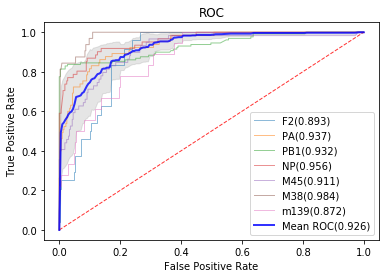

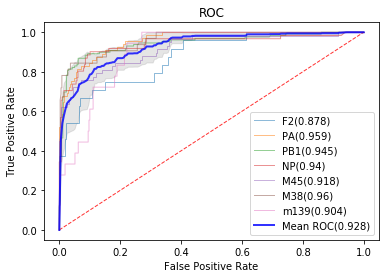

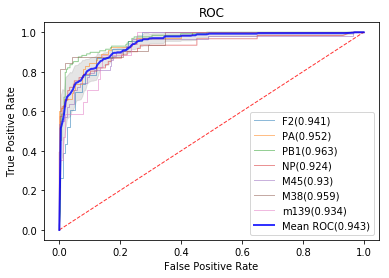

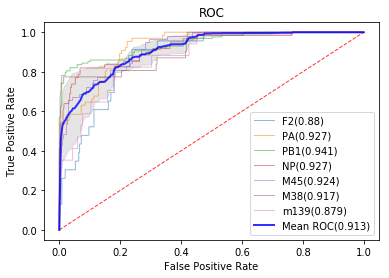

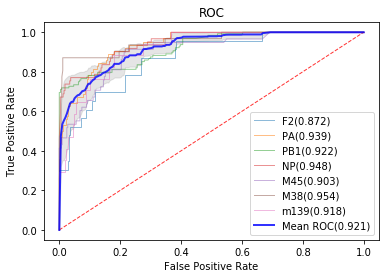

,AUROC,Accuracy,Precision,Recall
Fold 1,0.927734,0.708984,0.780762,0.592773
Fold 2,0.929688,0.754395,0.782715,0.651855
Fold 3,0.943848,0.742188,0.806152,0.630371
Fold 4,0.914062,0.697266,0.772461,0.596191
Fold 5,0.922852,0.698730,0.760254,0.617676
Avg.,0.927734,0.720215,0.780273,0.617676


In [8]:
X, y, epiname_list = data_preprocess('./data/Dash/Dash_mouse.csv', 3, False)
classifier = GradientBoostingClassifier(subsample=0.8,random_state=10, n_estimators=70, learning_rate=0.1, max_features='sqrt', max_depth=10)
auc_result, acc, precision, recall = predict_auc(X, y, classifier, 5, epiname_list, True)
pd.DataFrame(make_table(auc_result, acc, precision, recall), columns=['AUROC', 'Accuracy', 'Precision', 'Recall'], index=['Fold {}'.format(i+1) if i < 5 else 'Avg.' for i in range(6) ])

Reading file:  ./data/Dash/Dash_human.csv
Epitope                Number
BMLF                   76
pp65                   61
M1                     275


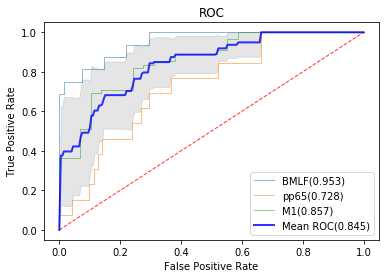

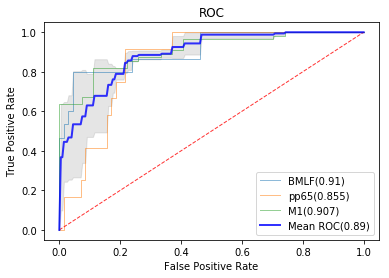

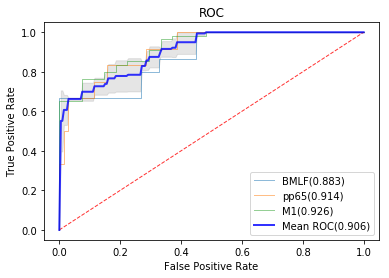

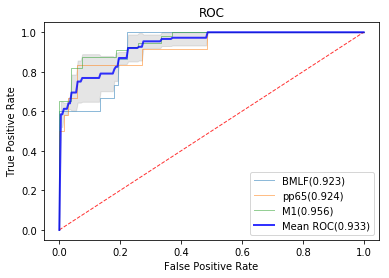

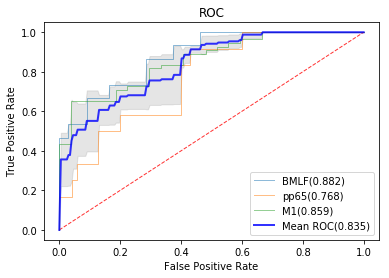

,AUROC,Accuracy,Precision,Recall
Fold 1,0.852051,0.785645,0.917969,0.567383
Fold 2,0.895996,0.755859,0.542969,0.504883
Fold 3,0.914062,0.792480,0.921387,0.561035
Fold 4,0.937988,0.829102,0.932129,0.649902
Fold 5,0.844238,0.780273,0.917969,0.544434
Avg.,0.888672,0.788574,0.846680,0.565430


In [9]:
X, y, epiname_list = data_preprocess('./data/Dash/Dash_human.csv', 3, False)
classifier = GradientBoostingClassifier(subsample=0.8,random_state=10, n_estimators=70, learning_rate=0.1, max_features='sqrt', max_depth=10)
auc_result, acc, precision, recall = predict_auc(X, y, classifier, 5, epiname_list, True)
pd.DataFrame(make_table(auc_result, acc, precision, recall), columns=['AUROC', 'Accuracy', 'Precision', 'Recall'], index=['Fold {}'.format(i+1) if i < 5 else 'Avg.' for i in range(6) ])

## Dash data unique

In [14]:
def make_auc_table(cv=5):
    # record auc result for each fold of cross-validation
    file_path_list = ['./data/Dash/Dash_human.csv', './data/Dash/Dash_mouse.csv']
    classifier = GradientBoostingClassifier(subsample=0.8,random_state=10, n_estimators=70, learning_rate=0.1, max_features='sqrt', max_depth=10)
    ret_df = pd.DataFrame()
    
    for file_path in file_path_list: 
        X, y, epiname_list = data_preprocess(file_path, 3, True)
        auc_result, acc, pre, rec = predict_auc(X, y, classifier, cv, epiname_list, False)
        df = pd.DataFrame(columns=['Fold-{}'.format(i+1)for i in range(cv)], index=epiname_list)
        for fold in auc_result:
            df.loc[:,"Fold-{}".format(fold)] = [round(auc_result[fold][i], 3) for i in range(len(epiname_list))]
         
        ret_df = pd.concat([ret_df, df])
    
    ret_df["Avg."] = round(ret_df.mean(axis=1),3)
    ret_df['Std.'] = round(ret_df.std(axis=1),3)
    ret_df.index = [["human", "human", "human", "mouse", "mouse", "mouse", "mouse", "mouse", "mouse", "mouse"], ret_df.index]
        
    return ret_df

make_auc_table()

Reading file:  ./data/Dash/Dash_human.csv
Epitope                Number
pp65                   54
M1                     150
BMLF                   54
Reading file:  ./data/Dash/Dash_mouse.csv
Epitope                Number
F2                     102
PA                     230
PB1                    335
NP                     149
m139                   73
M45                    201
M38                    60


Fold-1  Fold-2  Fold-3  Fold-4  Fold-5   Avg.   Std.
human pp65   0.592   0.616   0.557   0.659   0.813  0.647  0.089
      M1     0.594   0.768   0.733   0.765   0.863  0.745  0.087
      BMLF   0.579   0.829   0.860   0.847   0.878  0.799  0.111
mouse F2     0.799   0.749   0.761   0.744   0.757  0.762  0.019
      PA     0.878   0.885   0.744   0.810   0.806  0.825  0.052
      PB1    0.856   0.858   0.762   0.814   0.800  0.818  0.036
      NP     0.784   0.802   0.716   0.729   0.769  0.760  0.033
      m139   0.663   0.722   0.718   0.745   0.799  0.729  0.044
      M45    0.720   0.848   0.765   0.734   0.802  0.774  0.047
      M38    0.783   0.836   0.651   0.798   0.675  0.749  0.072

Reading file:  ./data/Dash/Dash_mouse.csv
Epitope                Number
F2                     102
PA                     230
PB1                    335
NP                     149
M45                    201
M38                    60
m139                   73


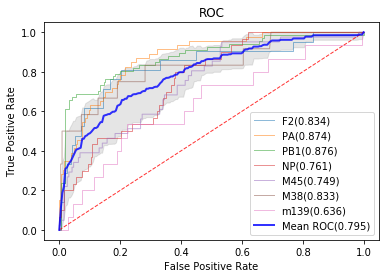

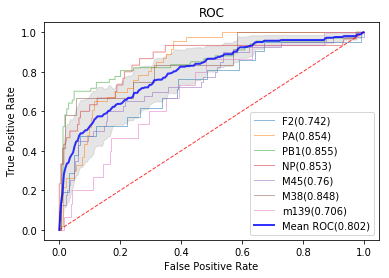

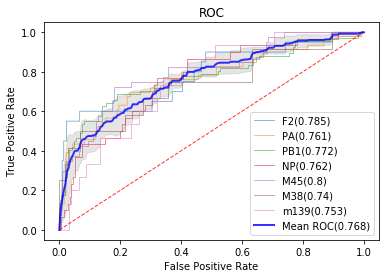

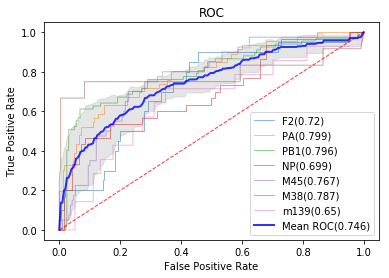

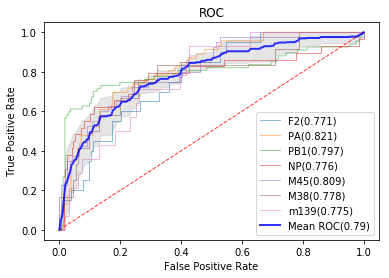

,AUROC,Accuracy,Precision,Recall
Fold 1,0.796875,0.500000,0.500488,0.363037
Fold 2,0.804688,0.510742,0.495117,0.384521
Fold 3,0.770020,0.460938,0.473389,0.346924
Fold 4,0.748047,0.449707,0.465088,0.339844
Fold 5,0.791992,0.513184,0.479248,0.368408
Avg.,0.782227,0.486816,0.482666,0.360596


In [10]:
X, y, epiname_list = data_preprocess('./data/Dash/Dash_mouse.csv', 3, True)
classifier = GradientBoostingClassifier(subsample=0.8,random_state=10, n_estimators=70, learning_rate=0.1, max_features='sqrt', max_depth=10)
auc_result, acc, precision, recall = predict_auc(X, y, classifier, 5, epiname_list, True)
pd.DataFrame(make_table(auc_result, acc, precision, recall), columns=['AUROC', 'Accuracy', 'Precision', 'Recall'], index=['Fold {}'.format(i+1) if i < 5 else 'Avg.' for i in range(6) ])

Reading file:  ./data/Dash/Dash_human.csv
Epitope                Number
BMLF                   54
pp65                   54
M1                     150


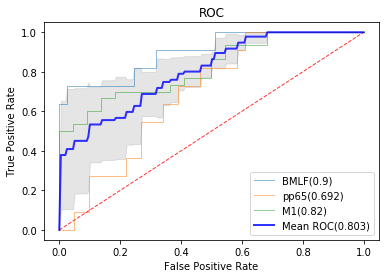

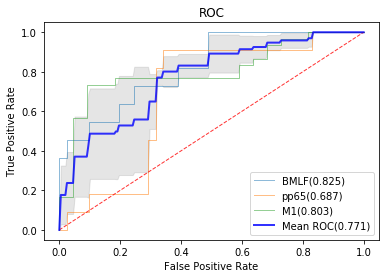

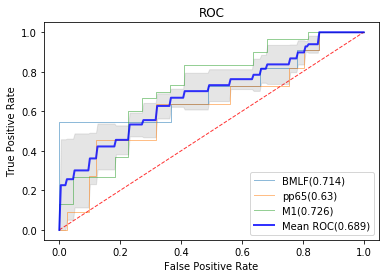

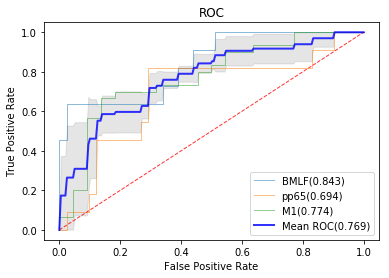

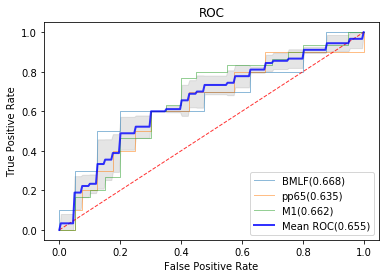

,AUROC,Accuracy,Precision,Recall
Fold 1,0.812988,0.634766,0.537598,0.424316
Fold 2,0.787109,0.615234,0.533203,0.394043
Fold 3,0.705566,0.653809,0.541504,0.454590
Fold 4,0.785645,0.653809,0.488037,0.473633
Fold 5,0.672363,0.620117,0.537598,0.366699
Avg.,0.752930,0.635742,0.527344,0.422607


In [11]:
X, y, epiname_list = data_preprocess('./data/Dash/Dash_human.csv', 3, True)
classifier = GradientBoostingClassifier(subsample=0.8,random_state=10, n_estimators=70, learning_rate=0.1, max_features='sqrt', max_depth=10)
auc_result, acc, precision, recall = predict_auc(X, y, classifier, 5, epiname_list, True)
pd.DataFrame(make_table(auc_result, acc, precision, recall), columns=['AUROC', 'Accuracy', 'Precision', 'Recall'], index=['Fold {}'.format(i+1) if i < 5 else 'Avg.' for i in range(6) ])

## Dash data unique 2

unique sequence defined as: cdr3b + vb

In [4]:
def make_auc_table(cv=5):
    # record auc result for each fold of cross-validation
    file_path_list = ['./data/Dash/Dash_human_with_vb.csv', './data/Dash/Dash_mouse_with_vb.csv']
    classifier = GradientBoostingClassifier(subsample=0.8,random_state=10, n_estimators=70, learning_rate=0.1, max_features='sqrt', max_depth=10)
    ret_df = pd.DataFrame()
    
    for file_path in file_path_list: 
        X, y, epiname_list = data_preprocess(file_path, 3, True)
        auc_result, acc, pre, rec = predict_auc(X, y, classifier, cv, epiname_list, False)
        df = pd.DataFrame(columns=['Fold-{}'.format(i+1)for i in range(cv)], index=epiname_list)
        for fold in auc_result:
            df.loc[:,"Fold-{}".format(fold)] = [round(auc_result[fold][i], 3) for i in range(len(epiname_list))]
         
        ret_df = pd.concat([ret_df, df])
    
    ret_df["Avg."] = round(ret_df.mean(axis=1),3)
    ret_df['Std.'] = round(ret_df.std(axis=1),3)
    ret_df.index = [["human", "human", "human", "mouse", "mouse", "mouse", "mouse", "mouse", "mouse", "mouse"], ret_df.index]
        
    return ret_df

make_auc_table()

Reading file:  ./data/Dash/Dash_human_with_vb.csv
Epitope                Number
M1                     167
BMLF                   55
pp65                   56
Reading file:  ./data/Dash/Dash_mouse_with_vb.csv
Epitope                Number
M38                    65
M45                    206
NP                     151
PB1                    408
m139                   73
F2                     103
PA                     232


Fold-1  Fold-2  Fold-3  Fold-4  Fold-5   Avg.   Std.
human M1     0.758   0.793   0.828   0.848   0.782  0.802  0.032
      BMLF   0.806   0.848   0.829   0.905   0.820  0.842  0.035
      pp65   0.587   0.697   0.750   0.684   0.700  0.684  0.053
mouse M38    0.757   0.716   0.836   0.823   0.809  0.788  0.045
      M45    0.843   0.822   0.707   0.864   0.784  0.804  0.055
      NP     0.731   0.802   0.801   0.827   0.814  0.795  0.033
      PB1    0.830   0.867   0.845   0.921   0.859  0.864  0.031
      m139   0.738   0.709   0.748   0.750   0.693  0.728  0.023
      F2     0.729   0.811   0.817   0.871   0.776  0.801  0.047
      PA     0.884   0.877   0.841   0.862   0.774  0.848  0.040

## VDJdb dataset original

### data_cleaning
This script will save the cleaned data in to csv file.

In [2]:
def vdj_preprocess(data_path, k):
    originalData = readFile(data_path, ['Species', 'Gene', 'Epitope'],
                                 ['CDR3', 'V', 'J', 'Reference', 'Meta'])

    epiDict = dataPreprocess(originalData, ['HomoSapiens'], ['TRB'], 50)
    saveEpitope(epiDict, 'data/epitope_tcr_pairs.csv')

vdj_preprocess('data/vdjdb_conf1.tsv', 3)

Epitope-TCR pairs have been saved in: data/epitope_tcr_pairs.csv


In [3]:
def make_auc_table(cv=5):
    # record auc result for each fold of cross-validation
    file_path_list = [ 'data/epitope_tcr_pairs.csv']
    classifier = GradientBoostingClassifier(subsample=0.8,random_state=10, n_estimators=70, learning_rate=0.1, max_features='sqrt', max_depth=10)
    ret_df = pd.DataFrame()
    
    for file_path in file_path_list: 
        X, y, epiname_list = data_preprocess(file_path, 3, False)
        auc_result, acc, pre, rec = predict_auc(X, y, classifier, cv, epiname_list, False)
        df = pd.DataFrame(columns=['Fold-{}'.format(i+1)for i in range(cv)], index=epiname_list)
        for fold in auc_result:
            df.loc[:,"Fold-{}".format(fold)] = [round(auc_result[fold][i], 3) for i in range(len(epiname_list))]
        
        ret_df = pd.concat([ret_df, df])
    
    ret_df["Avg."] = round(ret_df.mean(axis=1),3)
    ret_df['Std.'] = round(ret_df.std(axis=1),3)
        
    return ret_df

make_auc_table()

Reading file:  data/epitope_tcr_pairs.csv
Epitope                Number
PKYVKQNTLKLAT          56
LLWNGPMAV              223
GTSGSPIINR             51
GILGFVFTL              239
CINGVCWTV              76
RAKFKQLL               225
GLCTLVAML              299
GPGHKARVL              62
IPSINVHHY              65
KRWIILGLNK             212
ATDALMTGY              152
YVLDHLIVV              66
RPRGEVRFL              68
KAFSPEVIPMF            134
FRDYVDRFYKTLRAEQASQE   141
TPRVTGGGAM             184
TPQDLNTML              52
GTSGSPIVNR             65
FLKEKGGL               104
KLVALGINAV             65
NLVPMVATV              413
EIYKRWII               81


,Fold-1,Fold-2,Fold-3,Fold-4,Fold-5,Avg.,Std.
PKYVKQNTLKLAT,0.844,0.754,0.795,0.765,0.803,0.792,0.032
LLWNGPMAV,0.901,0.851,0.879,0.852,0.876,0.872,0.019
GTSGSPIINR,0.573,0.528,0.716,0.700,0.643,0.632,0.072
GILGFVFTL,0.922,0.909,0.932,0.934,0.929,0.925,0.009
CINGVCWTV,0.899,0.926,0.883,0.940,0.948,0.919,0.025
RAKFKQLL,0.922,0.898,0.880,0.910,0.925,0.907,0.017
GLCTLVAML,0.933,0.951,0.926,0.943,0.979,0.946,0.018
GPGHKARVL,0.794,0.867,0.790,0.839,0.841,0.826,0.030
IPSINVHHY,0.821,0.888,0.908,0.914,0.963,0.899,0.046
KRWIILGLNK,0.906,0.871,0.909,0.914,0.948,0.910,0.024


In [5]:
X, y, epiname_list = data_preprocess( 'data/epitope_tcr_pairs.csv', 3, False)
classifier = GradientBoostingClassifier(subsample=0.8,random_state=10, n_estimators=70, learning_rate=0.1, max_features='sqrt', max_depth=10)
auc_result, acc, precision, recall = predict_auc(X, y, classifier, 5, epiname_list, False)
pd.DataFrame(make_table(auc_result, acc, precision, recall), columns=['AUROC', 'Accuracy', 'Precision', 'Recall'], index=['Fold {}'.format(i+1) if i < 5 else 'Avg.' for i in range(6) ])

Reading file:  data/epitope_tcr_pairs.csv
Epitope                Number
LLWNGPMAV              223
KLVALGINAV             65
RPRGEVRFL              68
GPGHKARVL              62
ATDALMTGY              152
PKYVKQNTLKLAT          56
KRWIILGLNK             212
FLKEKGGL               104
YVLDHLIVV              66
EIYKRWII               81
TPRVTGGGAM             184
GTSGSPIINR             51
RAKFKQLL               225
GILGFVFTL              239
CINGVCWTV              76
IPSINVHHY              65
GTSGSPIVNR             65
FRDYVDRFYKTLRAEQASQE   141
KAFSPEVIPMF            134
TPQDLNTML              52
NLVPMVATV              413
GLCTLVAML              299


,AUROC,Accuracy,Precision,Recall
Fold 1,0.877930,0.579590,0.625977,0.478271
Fold 2,0.861328,0.552246,0.583984,0.438721
Fold 3,0.874512,0.577637,0.652344,0.469238
Fold 4,0.859863,0.567383,0.582520,0.447021
Fold 5,0.876953,0.585449,0.643066,0.470215
Avg.,0.870117,0.572266,0.617676,0.460693


## VDJdb dataset unique

In [2]:
def make_auc_table(cv=5):
    # record auc result for each fold of cross-validation
    file_path_list = [ 'data/epitope_tcr_pairs.csv']
    classifier = GradientBoostingClassifier(subsample=0.8,random_state=10, n_estimators=70, learning_rate=0.1, max_features='sqrt', max_depth=10)
    ret_df = pd.DataFrame()
    
    for file_path in file_path_list: 
        X, y, epiname_list = data_preprocess(file_path, 3, True)
        auc_result, acc, pre, rec = predict_auc(X, y, classifier, cv, epiname_list, False)
        df = pd.DataFrame(columns=['Fold-{}'.format(i+1)for i in range(cv)], index=epiname_list)
        for fold in auc_result:
            df.loc[:,"Fold-{}".format(fold)] = [round(auc_result[fold][i], 3) for i in range(len(epiname_list))]
        
        ret_df = pd.concat([ret_df, df])
    
    ret_df["Avg."] = round(ret_df.mean(axis=1),3)
    ret_df['Std.'] = round(ret_df.std(axis=1),3)
        
    return ret_df

ret_df = make_auc_table()
ret_df

Reading file:  data/epitope_tcr_pairs.csv
Epitope                Number
CINGVCWTV              39
LLWNGPMAV              198
TPRVTGGGAM             122
GTSGSPIVNR             59
RPRGEVRFL              29
PKYVKQNTLKLAT          50
KRWIILGLNK             141
EIYKRWII               60
ATDALMTGY              139
RAKFKQLL               149
GPGHKARVL              53
KLVALGINAV             65
GILGFVFTL              138
KAFSPEVIPMF            104
FLKEKGGL               78
YVLDHLIVV              51
TPQDLNTML              40
FRDYVDRFYKTLRAEQASQE   95
NLVPMVATV              242
GLCTLVAML              152
IPSINVHHY              58
GTSGSPIINR             46


,Fold-1,Fold-2,Fold-3,Fold-4,Fold-5,Avg.,Std.
CINGVCWTV,0.629,0.505,0.650,0.580,0.587,0.590,0.050
LLWNGPMAV,0.723,0.788,0.767,0.762,0.643,0.737,0.051
TPRVTGGGAM,0.739,0.786,0.727,0.710,0.694,0.731,0.031
GTSGSPIVNR,0.547,0.697,0.343,0.336,0.600,0.505,0.143
RPRGEVRFL,0.784,0.798,0.752,0.698,0.754,0.757,0.034
PKYVKQNTLKLAT,0.521,0.625,0.648,0.569,0.618,0.596,0.046
KRWIILGLNK,0.752,0.739,0.773,0.682,0.710,0.731,0.032
EIYKRWII,0.522,0.586,0.689,0.598,0.619,0.603,0.054
ATDALMTGY,0.733,0.825,0.825,0.764,0.851,0.800,0.044
RAKFKQLL,0.623,0.663,0.660,0.615,0.650,0.642,0.020


In [3]:
X, y, epiname_list = data_preprocess( 'data/epitope_tcr_pairs.csv', 3, True)
classifier = GradientBoostingClassifier(subsample=0.8,random_state=10, n_estimators=70, learning_rate=0.1, max_features='sqrt', max_depth=10)
auc_result, acc, precision, recall = predict_auc(X, y, classifier, 5, epiname_list, False)
pd.DataFrame(make_table(auc_result, acc, precision, recall), columns=['AUROC', 'Accuracy', 'Precision', 'Recall'], index=['Fold {}'.format(i+1) if i < 5 else 'Avg.' for i in range(6) ])

Reading file:  data/epitope_tcr_pairs.csv
Epitope                Number
CINGVCWTV              39
LLWNGPMAV              198
TPRVTGGGAM             122
GTSGSPIVNR             59
RPRGEVRFL              29
PKYVKQNTLKLAT          50
KRWIILGLNK             141
EIYKRWII               60
ATDALMTGY              139
RAKFKQLL               149
GPGHKARVL              53
KLVALGINAV             65
GILGFVFTL              138
KAFSPEVIPMF            104
FLKEKGGL               78
YVLDHLIVV              51
TPQDLNTML              40
FRDYVDRFYKTLRAEQASQE   95
NLVPMVATV              242
GLCTLVAML              152
IPSINVHHY              58
GTSGSPIINR             46


,AUROC,Accuracy,Precision,Recall
Fold 1,0.694824,0.272705,0.291504,0.188965
Fold 2,0.698730,0.286377,0.312744,0.206177
Fold 3,0.686035,0.283691,0.240967,0.185059
Fold 4,0.683594,0.289551,0.272461,0.204712
Fold 5,0.669434,0.259766,0.220825,0.176025
Avg.,0.686523,0.278320,0.267578,0.192139
